In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
%matplotlib inline

from differentially_private_algorithm import Logistic_Regression

In [2]:
data1=pd.read_csv("data/mnist_train.csv")
data2=pd.read_csv("data/mnist_test.csv")
data=pd.concat([data1,data2])

data3=data.loc[data['label']==5]  # binary classifier, only choosing 5 and 8
data4=data.loc[data['label']==8]
data=pd.concat([data3,data4])
data.shape, data.label.unique()

((13138, 785), array([5, 8]))

In [3]:
X = data.iloc[:,1:].to_numpy()/255
Y = data.iloc[:,0].to_numpy()//8
x, xt, y, yt = train_test_split(X, Y, test_size=0.2, random_state=9)

In [5]:
#differentially_private: Enabled
lr_clf  = Logistic_Regression(x, y ,alpha=.1, differentially_private=True)
theta, train_history, cv_history, theta_history = lr_clf.fit(verbose=False)
accuracy, _,_ = lr_clf.predict(xt,yt)
print("Accuracy: ",accuracy)

100%|██████████| 100/100 [00:04<00:00, 22.98it/s]

Stats: Iterations 100, Train-Loss:  0.20159225322198052, CV-Loss:  0.20487634672897304
Accuracy:  0.943683409436834


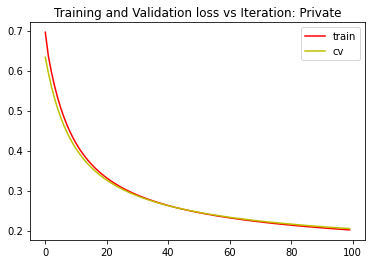

In [6]:
#Training and Validation loss vs Iteration: Private

plt.plot(train_history, 'r', label='train')
plt.plot(cv_history, 'y', label='cv')
plt.title("Training and Validation loss vs Iteration: Private")
plt.legend(loc=0)
plt.show()

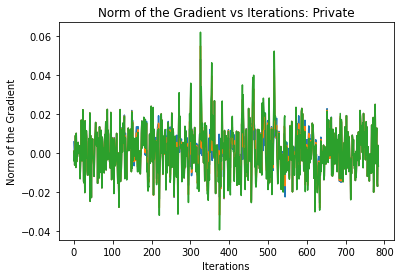

In [8]:
#Norm of the Gradient vs Iterations: Private 

plt.plot(theta_history[:][0])
plt.plot(theta_history[:][1])
plt.plot(theta_history[:][2])
plt.xlabel("Iterations")
plt.ylabel("Norm of the Gradient")
plt.title("Norm of the Gradient vs Iterations: Private")
plt.show()

In [9]:
#differentially_private: Disabled
lr_clf_np  = Logistic_Regression(x, y ,alpha=.1, differentially_private=False)
theta, train_history, cv_history, theta_history = lr_clf_np.fit(verbose=False)
accuracy, _,_ = lr_clf_np.predict(xt,yt)
print("Accuracy: ",accuracy)

100%|██████████| 100/100 [00:01<00:00, 73.95it/s]

Stats: Iterations 100, Train-Loss:  0.20194630419455317, CV-Loss:  0.20551056521114094
Accuracy:  0.9448249619482496


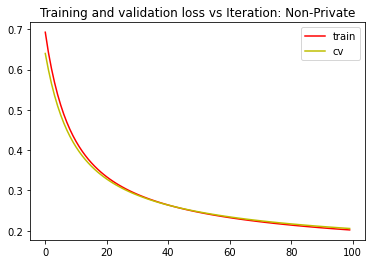

In [10]:
# Training and validation loss vs Iteration: Non-Private

plt.plot(train_history, 'r', label='train')
plt.plot(cv_history, 'y', label='cv')
plt.title("Training and validation loss vs Iteration: Non-Private")
plt.legend(loc=0)
plt.show()

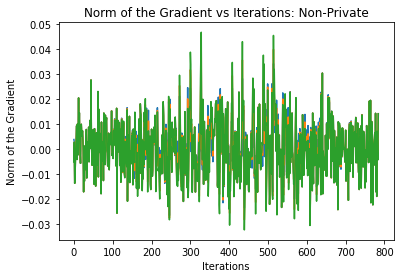

In [11]:
#Norm of the Gradient vs Iterations: Non-Private"

plt.plot(theta_history[:][0])
plt.plot(theta_history[:][1])
plt.plot(theta_history[:][2])
plt.xlabel("Iterations")
plt.ylabel("Norm of the Gradient")
plt.title("Norm of the Gradient vs Iterations: Non-Private")
plt.show()

#### Loss vs % of sample used in training

In [12]:
def loss_vs_sample(x, y, it = 100,iterations = 100,differentially_private = False):
    train_historys = []
    cv_historys = []
    for i in range(500,x.shape[0],x.shape[0]//it):

        idx = np.random.permutation([j for j in range(x.shape[0])])
        
        fl_clf = Logistic_Regression(x[idx[:i]], y[idx[0:i]], 
                                        alpha=.1, iteration = iterations,
                                        differentially_private=differentially_private)

        theta, train_history, cv_history, theta_history = fl_clf.fit()
        
        train_historys.append(train_history[-1])
        cv_historys.append(cv_history[-1])
        
    return train_historys, cv_historys

100%|██████████| 100/100 [00:00<00:00, 353.21it/s]


Stats: Iterations 100, Train-Loss:  0.167496456209217, CV-Loss:  0.17916408949299192


100%|██████████| 100/100 [00:00<00:00, 285.76it/s]


Stats: Iterations 100, Train-Loss:  0.17000378008465275, CV-Loss:  0.19918406731285546


100%|██████████| 100/100 [00:00<00:00, 266.96it/s]


Stats: Iterations 100, Train-Loss:  0.19251461930109925, CV-Loss:  0.16276444143903823


100%|██████████| 100/100 [00:00<00:00, 206.38it/s]


Stats: Iterations 100, Train-Loss:  0.1862821965895422, CV-Loss:  0.16260336511824816


100%|██████████| 100/100 [00:00<00:00, 195.66it/s]


Stats: Iterations 100, Train-Loss:  0.18401762028051002, CV-Loss:  0.2104293180178365


100%|██████████| 100/100 [00:00<00:00, 199.38it/s]


Stats: Iterations 100, Train-Loss:  0.18971203010939153, CV-Loss:  0.23640349285291284


100%|██████████| 100/100 [00:00<00:00, 199.62it/s]


Stats: Iterations 100, Train-Loss:  0.19413867271067542, CV-Loss:  0.1750160897292142


100%|██████████| 100/100 [00:00<00:00, 151.47it/s]


Stats: Iterations 100, Train-Loss:  0.1873783626682306, CV-Loss:  0.180557777232725


100%|██████████| 100/100 [00:00<00:00, 117.10it/s]


Stats: Iterations 100, Train-Loss:  0.2022813987761129, CV-Loss:  0.1796748431001288


100%|██████████| 100/100 [00:00<00:00, 125.36it/s]


Stats: Iterations 100, Train-Loss:  0.2008234866300394, CV-Loss:  0.23793281538290798


100%|██████████| 100/100 [00:00<00:00, 123.01it/s]


Stats: Iterations 100, Train-Loss:  0.18868932022953155, CV-Loss:  0.17932022534806213


100%|██████████| 100/100 [00:00<00:00, 111.54it/s]


Stats: Iterations 100, Train-Loss:  0.17835117434084471, CV-Loss:  0.21610996476888045


100%|██████████| 100/100 [00:00<00:00, 107.44it/s]


Stats: Iterations 100, Train-Loss:  0.19204351968060998, CV-Loss:  0.2108235245155493


100%|██████████| 100/100 [00:00<00:00, 118.00it/s]


Stats: Iterations 100, Train-Loss:  0.20992375667772298, CV-Loss:  0.20212717631579516


100%|██████████| 100/100 [00:01<00:00, 87.33it/s]


Stats: Iterations 100, Train-Loss:  0.19608863854806752, CV-Loss:  0.15472625136410548


100%|██████████| 100/100 [00:01<00:00, 81.79it/s]


Stats: Iterations 100, Train-Loss:  0.19873572709210335, CV-Loss:  0.23215463888811483


100%|██████████| 100/100 [00:01<00:00, 83.63it/s]


Stats: Iterations 100, Train-Loss:  0.19869900927441692, CV-Loss:  0.2103732486554314


100%|██████████| 100/100 [00:01<00:00, 70.40it/s]


Stats: Iterations 100, Train-Loss:  0.20477062447113992, CV-Loss:  0.23908523325571873


100%|██████████| 100/100 [00:01<00:00, 71.15it/s]


Stats: Iterations 100, Train-Loss:  0.19892615361782645, CV-Loss:  0.21051231848291804


100%|██████████| 100/100 [00:01<00:00, 76.92it/s]


Stats: Iterations 100, Train-Loss:  0.20432587906472122, CV-Loss:  0.19435197354958478


100%|██████████| 100/100 [00:01<00:00, 57.43it/s]


Stats: Iterations 100, Train-Loss:  0.19897736768440763, CV-Loss:  0.18641224053647004


100%|██████████| 100/100 [00:01<00:00, 71.62it/s]


Stats: Iterations 100, Train-Loss:  0.208925278537086, CV-Loss:  0.21924103331727549


100%|██████████| 100/100 [00:01<00:00, 70.58it/s]


Stats: Iterations 100, Train-Loss:  0.20499770091733552, CV-Loss:  0.20282142017320537


100%|██████████| 100/100 [00:01<00:00, 73.64it/s]


Stats: Iterations 100, Train-Loss:  0.20239197985395657, CV-Loss:  0.19907466696890894


100%|██████████| 100/100 [00:01<00:00, 66.67it/s]


Stats: Iterations 100, Train-Loss:  0.1908215284884157, CV-Loss:  0.2283792876451362


100%|██████████| 100/100 [00:01<00:00, 64.97it/s]


Stats: Iterations 100, Train-Loss:  0.19047918422833235, CV-Loss:  0.19643756561505887


100%|██████████| 100/100 [00:01<00:00, 59.68it/s]


Stats: Iterations 100, Train-Loss:  0.1916741461448846, CV-Loss:  0.20659405787841437


100%|██████████| 100/100 [00:01<00:00, 66.58it/s]


Stats: Iterations 100, Train-Loss:  0.1974446633743946, CV-Loss:  0.18956302642558284


100%|██████████| 100/100 [00:01<00:00, 58.30it/s]


Stats: Iterations 100, Train-Loss:  0.20033179070894966, CV-Loss:  0.20807324112373446


100%|██████████| 100/100 [00:01<00:00, 59.97it/s]


Stats: Iterations 100, Train-Loss:  0.1991953557184262, CV-Loss:  0.2273009494026277


100%|██████████| 100/100 [00:01<00:00, 57.23it/s]


Stats: Iterations 100, Train-Loss:  0.19858835209456407, CV-Loss:  0.1768554712206551


100%|██████████| 100/100 [00:01<00:00, 55.63it/s]


Stats: Iterations 100, Train-Loss:  0.19665112680314067, CV-Loss:  0.19441316759409505


100%|██████████| 100/100 [00:02<00:00, 47.59it/s]


Stats: Iterations 100, Train-Loss:  0.19787330440169817, CV-Loss:  0.2393821912554611


100%|██████████| 100/100 [00:01<00:00, 53.74it/s]


Stats: Iterations 100, Train-Loss:  0.20120225044090187, CV-Loss:  0.2169902459111962


100%|██████████| 100/100 [00:01<00:00, 50.53it/s]


Stats: Iterations 100, Train-Loss:  0.2023157662323958, CV-Loss:  0.18898353314273061


100%|██████████| 100/100 [00:02<00:00, 47.38it/s]


Stats: Iterations 100, Train-Loss:  0.189124155389752, CV-Loss:  0.19756601408978816


100%|██████████| 100/100 [00:02<00:00, 47.24it/s]


Stats: Iterations 100, Train-Loss:  0.19026330155425145, CV-Loss:  0.1942853602879221


100%|██████████| 100/100 [00:02<00:00, 49.02it/s]


Stats: Iterations 100, Train-Loss:  0.19570751993917315, CV-Loss:  0.21689224047668393


100%|██████████| 100/100 [00:02<00:00, 44.05it/s]


Stats: Iterations 100, Train-Loss:  0.19441248503333453, CV-Loss:  0.21121010685277103


100%|██████████| 100/100 [00:02<00:00, 47.96it/s]


Stats: Iterations 100, Train-Loss:  0.20053321822461934, CV-Loss:  0.22777187616613823


100%|██████████| 100/100 [00:02<00:00, 47.88it/s]


Stats: Iterations 100, Train-Loss:  0.19569767264362667, CV-Loss:  0.19303278937351892


100%|██████████| 100/100 [00:02<00:00, 46.73it/s]


Stats: Iterations 100, Train-Loss:  0.20149319873819685, CV-Loss:  0.21143772107289419


100%|██████████| 100/100 [00:02<00:00, 47.10it/s]


Stats: Iterations 100, Train-Loss:  0.197365264839147, CV-Loss:  0.20623535097577045


100%|██████████| 100/100 [00:02<00:00, 38.26it/s]


Stats: Iterations 100, Train-Loss:  0.19748580964548115, CV-Loss:  0.21727817129732738


100%|██████████| 100/100 [00:02<00:00, 36.32it/s]


Stats: Iterations 100, Train-Loss:  0.19723198972974332, CV-Loss:  0.1968472143203232


100%|██████████| 100/100 [00:02<00:00, 40.22it/s]


Stats: Iterations 100, Train-Loss:  0.20553963051417035, CV-Loss:  0.20712676954546125


100%|██████████| 100/100 [00:02<00:00, 41.12it/s]


Stats: Iterations 100, Train-Loss:  0.20271426605666615, CV-Loss:  0.20254314315464406


100%|██████████| 100/100 [00:02<00:00, 41.07it/s]


Stats: Iterations 100, Train-Loss:  0.20046173469729908, CV-Loss:  0.1982464788515079


100%|██████████| 100/100 [00:02<00:00, 40.88it/s]


Stats: Iterations 100, Train-Loss:  0.20413321112437166, CV-Loss:  0.19683903127894886


100%|██████████| 100/100 [00:02<00:00, 41.11it/s]


Stats: Iterations 100, Train-Loss:  0.19528205835361628, CV-Loss:  0.1947598686189502


100%|██████████| 100/100 [00:02<00:00, 39.04it/s]


Stats: Iterations 100, Train-Loss:  0.20936155869778825, CV-Loss:  0.17916384178318612


100%|██████████| 100/100 [00:02<00:00, 37.66it/s]


Stats: Iterations 100, Train-Loss:  0.20364951163465414, CV-Loss:  0.19721360935721155


100%|██████████| 100/100 [00:02<00:00, 37.28it/s]


Stats: Iterations 100, Train-Loss:  0.1988877800350436, CV-Loss:  0.22394765232365427


100%|██████████| 100/100 [00:02<00:00, 36.55it/s]


Stats: Iterations 100, Train-Loss:  0.20086590703421608, CV-Loss:  0.20465087087507552


100%|██████████| 100/100 [00:02<00:00, 35.83it/s]


Stats: Iterations 100, Train-Loss:  0.20754746778506766, CV-Loss:  0.2007026780087225


100%|██████████| 100/100 [00:02<00:00, 34.97it/s]


Stats: Iterations 100, Train-Loss:  0.2025478068017578, CV-Loss:  0.20685588351134232


100%|██████████| 100/100 [00:03<00:00, 32.20it/s]


Stats: Iterations 100, Train-Loss:  0.20136127413354885, CV-Loss:  0.20999098929371132


100%|██████████| 100/100 [00:03<00:00, 31.50it/s]


Stats: Iterations 100, Train-Loss:  0.2036085585294845, CV-Loss:  0.18506704814712374


100%|██████████| 100/100 [00:03<00:00, 30.23it/s]


Stats: Iterations 100, Train-Loss:  0.20170054088781608, CV-Loss:  0.22166096812450403


100%|██████████| 100/100 [00:03<00:00, 33.31it/s]


Stats: Iterations 100, Train-Loss:  0.20065540064682458, CV-Loss:  0.20645304485283228


100%|██████████| 100/100 [00:03<00:00, 28.57it/s]


Stats: Iterations 100, Train-Loss:  0.197606013762366, CV-Loss:  0.20101863596390765


100%|██████████| 100/100 [00:03<00:00, 25.44it/s]


Stats: Iterations 100, Train-Loss:  0.20017856763069083, CV-Loss:  0.21060446537010374


100%|██████████| 100/100 [00:03<00:00, 29.81it/s]


Stats: Iterations 100, Train-Loss:  0.20402869215237945, CV-Loss:  0.19215637119131979


100%|██████████| 100/100 [00:03<00:00, 29.07it/s]


Stats: Iterations 100, Train-Loss:  0.20190012369277271, CV-Loss:  0.20150119493531055


100%|██████████| 100/100 [00:03<00:00, 30.02it/s]


Stats: Iterations 100, Train-Loss:  0.1993066356808186, CV-Loss:  0.19660001444392888


100%|██████████| 100/100 [00:03<00:00, 28.62it/s]


Stats: Iterations 100, Train-Loss:  0.1978433560281084, CV-Loss:  0.21060060732465444


100%|██████████| 100/100 [00:03<00:00, 26.70it/s]


Stats: Iterations 100, Train-Loss:  0.2067643209588073, CV-Loss:  0.18893893308491738


100%|██████████| 100/100 [00:03<00:00, 28.55it/s]


Stats: Iterations 100, Train-Loss:  0.1986930708791352, CV-Loss:  0.21335848337438473


100%|██████████| 100/100 [00:03<00:00, 25.87it/s]


Stats: Iterations 100, Train-Loss:  0.20264625177858783, CV-Loss:  0.1949043224635061


100%|██████████| 100/100 [00:03<00:00, 25.93it/s]


Stats: Iterations 100, Train-Loss:  0.1963930221282802, CV-Loss:  0.22908648691519917


100%|██████████| 100/100 [00:03<00:00, 27.10it/s]


Stats: Iterations 100, Train-Loss:  0.1989610482672608, CV-Loss:  0.20318135113737296


100%|██████████| 100/100 [00:03<00:00, 27.11it/s]


Stats: Iterations 100, Train-Loss:  0.19516389487889857, CV-Loss:  0.2004787210691761


100%|██████████| 100/100 [00:03<00:00, 26.55it/s]


Stats: Iterations 100, Train-Loss:  0.1998709867324251, CV-Loss:  0.21920920628633536


100%|██████████| 100/100 [00:03<00:00, 27.94it/s]


Stats: Iterations 100, Train-Loss:  0.20250307485849886, CV-Loss:  0.1896641183055096


100%|██████████| 100/100 [00:03<00:00, 25.44it/s]


Stats: Iterations 100, Train-Loss:  0.20316617439643067, CV-Loss:  0.2042349479775526


100%|██████████| 100/100 [00:03<00:00, 25.20it/s]


Stats: Iterations 100, Train-Loss:  0.2026191708067084, CV-Loss:  0.20630787875823225


100%|██████████| 100/100 [00:04<00:00, 24.60it/s]


Stats: Iterations 100, Train-Loss:  0.2002007281420928, CV-Loss:  0.21022139721489727


100%|██████████| 100/100 [00:03<00:00, 25.52it/s]


Stats: Iterations 100, Train-Loss:  0.2049318988996698, CV-Loss:  0.19674115528935968


100%|██████████| 100/100 [00:04<00:00, 24.74it/s]


Stats: Iterations 100, Train-Loss:  0.19805692088103938, CV-Loss:  0.21144783742507742


100%|██████████| 100/100 [00:04<00:00, 21.90it/s]


Stats: Iterations 100, Train-Loss:  0.20086276246101387, CV-Loss:  0.20662515009659438


100%|██████████| 100/100 [00:04<00:00, 23.71it/s]


Stats: Iterations 100, Train-Loss:  0.20088819905677194, CV-Loss:  0.2127231480936582


100%|██████████| 100/100 [00:04<00:00, 23.42it/s]


Stats: Iterations 100, Train-Loss:  0.20560495315933855, CV-Loss:  0.19244265069486238


100%|██████████| 100/100 [00:04<00:00, 23.36it/s]


Stats: Iterations 100, Train-Loss:  0.20146510123373457, CV-Loss:  0.2038405918049442


100%|██████████| 100/100 [00:04<00:00, 21.77it/s]


Stats: Iterations 100, Train-Loss:  0.2036902362517636, CV-Loss:  0.18829688951377588


100%|██████████| 100/100 [00:04<00:00, 22.54it/s]


Stats: Iterations 100, Train-Loss:  0.20053857357561702, CV-Loss:  0.20870591579546502


100%|██████████| 100/100 [00:04<00:00, 23.08it/s]


Stats: Iterations 100, Train-Loss:  0.20293882879954075, CV-Loss:  0.19891361259507415


100%|██████████| 100/100 [00:04<00:00, 22.18it/s]


Stats: Iterations 100, Train-Loss:  0.20337754059874336, CV-Loss:  0.187778921447475


100%|██████████| 100/100 [00:04<00:00, 21.61it/s]


Stats: Iterations 100, Train-Loss:  0.2021199778832998, CV-Loss:  0.19597132601271475


100%|██████████| 100/100 [00:04<00:00, 21.09it/s]


Stats: Iterations 100, Train-Loss:  0.2027815643459747, CV-Loss:  0.19774588868720488


100%|██████████| 100/100 [00:05<00:00, 19.87it/s]


Stats: Iterations 100, Train-Loss:  0.20339856744132337, CV-Loss:  0.1945198560479962


100%|██████████| 100/100 [00:04<00:00, 21.37it/s]


Stats: Iterations 100, Train-Loss:  0.203923865259527, CV-Loss:  0.19976516477305728


100%|██████████| 100/100 [00:04<00:00, 21.91it/s]


Stats: Iterations 100, Train-Loss:  0.20269723350794225, CV-Loss:  0.194202725363361


100%|██████████| 100/100 [00:04<00:00, 22.21it/s]


Stats: Iterations 100, Train-Loss:  0.2009172260125491, CV-Loss:  0.21280430606417736


100%|██████████| 100/100 [00:04<00:00, 20.03it/s]


Stats: Iterations 100, Train-Loss:  0.20218323342328628, CV-Loss:  0.2013441396732156


100%|██████████| 100/100 [00:04<00:00, 20.44it/s]


Stats: Iterations 100, Train-Loss:  0.20248697912874836, CV-Loss:  0.19848190527697748


100%|██████████| 100/100 [00:04<00:00, 21.73it/s]

Stats: Iterations 100, Train-Loss:  0.20116388079149103, CV-Loss:  0.20748161727751996


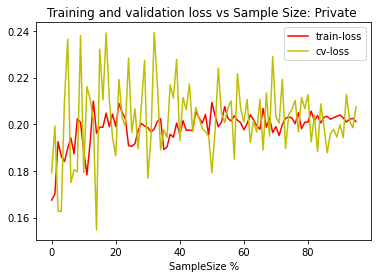

In [18]:
train_historys, cv_historys = loss_vs_sample(x,y, differentially_private= True)

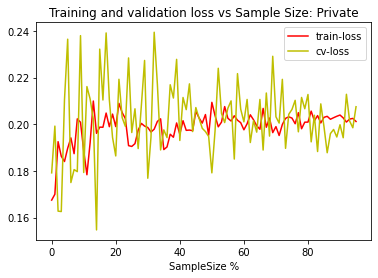

In [19]:
plt.plot(train_historys, 'r', label='train-loss')
plt.plot(cv_historys, 'y', label='cv-loss')
plt.title("Training and validation loss vs Sample Size: Private")
plt.xlabel('SampleSize %')
plt.legend(loc=0)
plt.show()

In [ ]:
train_historys, cv_historys = loss_vs_sample(x,y)

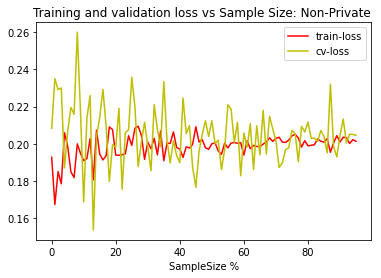

In [17]:
plt.plot(train_historys, 'r', label='train-loss')
plt.plot(cv_historys, 'y', label='cv-loss')
plt.title("Training and validation loss vs Sample Size: Non-Private ")
plt.xlabel('SampleSize %')
plt.legend(loc=0)
plt.show()

#### Training and validation loss vs Varying Regularization Parameter Lambda

In [14]:
def regularization_vs_loss(regularizations, it = 50, differentially_private= False):
    train_historys = []
    cv_historys = []
    
    for r in regularizations:        
        lr_clf = Logistic_Regression(x, y ,iteration = it, alpha=.1,regularization= r, differentially_private = differentially_private)
        theta, train_history, cv_history, theta_history = lr_clf.fit()
        
        train_historys.append(train_history[-1])
        cv_historys.append(cv_history[-1])  
        
    return train_historys,cv_historys

In [15]:
regularizations  = np.sort(np.linspace(0,1,10)).round(2)
print(regularizations)

[0.   0.11 0.22 0.33 0.44 0.56 0.67 0.78 0.89 1.  ]


In [16]:
#R = [.1,.2,.3,.4,.5]
train_historys,cv_historys = regularization_vs_loss(regularizations)

100%|██████████| 50/50 [00:00<00:00, 77.11it/s]


Stats: Iterations 50, Train-Loss:  0.24611925200894239, CV-Loss:  0.24668061350180187


100%|██████████| 50/50 [00:00<00:00, 65.00it/s]


Stats: Iterations 50, Train-Loss:  0.28187885666640045, CV-Loss:  0.28192104945187385


100%|██████████| 50/50 [00:00<00:00, 73.52it/s]


Stats: Iterations 50, Train-Loss:  0.3156221529889705, CV-Loss:  0.3154133835703909


100%|██████████| 50/50 [00:00<00:00, 56.27it/s]


Stats: Iterations 50, Train-Loss:  0.34495200400628, CV-Loss:  0.34461491098451735


100%|██████████| 50/50 [00:00<00:00, 70.58it/s]


Stats: Iterations 50, Train-Loss:  0.37053290347859846, CV-Loss:  0.36986985706060455


100%|██████████| 50/50 [00:00<00:00, 75.19it/s]


Stats: Iterations 50, Train-Loss:  0.3942999154703841, CV-Loss:  0.3934274515718543


100%|██████████| 50/50 [00:00<00:00, 71.43it/s]


Stats: Iterations 50, Train-Loss:  0.4130921790193163, CV-Loss:  0.4120240812632986


100%|██████████| 50/50 [00:00<00:00, 71.07it/s]


Stats: Iterations 50, Train-Loss:  0.42961003446462426, CV-Loss:  0.42838240014322587


100%|██████████| 50/50 [00:00<00:00, 67.33it/s]


Stats: Iterations 50, Train-Loss:  0.44410376405013485, CV-Loss:  0.4427597674468428


100%|██████████| 50/50 [00:00<00:00, 69.29it/s]

Stats: Iterations 50, Train-Loss:  0.4569876475113137, CV-Loss:  0.45553757029778025


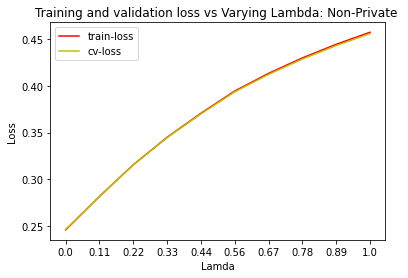

In [17]:
values = range(len(regularizations))
plt.plot(train_historys, 'r', label='train-loss')
plt.plot(cv_historys, 'y', label='cv-loss')
plt.title("Training and validation loss vs Varying Lambda: Non-Private ")
plt.xlabel('Lamda')
plt.ylabel("Loss")
plt.xticks(values,regularizations)
plt.legend(loc=0)
plt.show()

In [18]:
#R = [.1,.2,.3,.4,.5]
train_historys,cv_historys = regularization_vs_loss(regularizations, differentially_private=True)

100%|██████████| 50/50 [00:02<00:00, 23.16it/s]


Stats: Iterations 50, Train-Loss:  0.2466259999902554, CV-Loss:  0.24697945997948653


100%|██████████| 50/50 [00:02<00:00, 22.93it/s]


Stats: Iterations 50, Train-Loss:  0.28209604670574767, CV-Loss:  0.28205729259086787


100%|██████████| 50/50 [00:02<00:00, 22.99it/s]


Stats: Iterations 50, Train-Loss:  0.3158486895330363, CV-Loss:  0.3158153497382532


100%|██████████| 50/50 [00:02<00:00, 22.80it/s]


Stats: Iterations 50, Train-Loss:  0.34480513541094204, CV-Loss:  0.34444110639828895


100%|██████████| 50/50 [00:02<00:00, 23.27it/s]


Stats: Iterations 50, Train-Loss:  0.37043877999989716, CV-Loss:  0.3697409476397632


100%|██████████| 50/50 [00:02<00:00, 23.11it/s]


Stats: Iterations 50, Train-Loss:  0.3943248957497769, CV-Loss:  0.39335692852351517


100%|██████████| 50/50 [00:02<00:00, 23.10it/s]


Stats: Iterations 50, Train-Loss:  0.41312167498410657, CV-Loss:  0.41207137256157766


100%|██████████| 50/50 [00:02<00:00, 22.41it/s]


Stats: Iterations 50, Train-Loss:  0.42954730472523506, CV-Loss:  0.42832596578925786


100%|██████████| 50/50 [00:02<00:00, 22.84it/s]


Stats: Iterations 50, Train-Loss:  0.4441028566875547, CV-Loss:  0.4426435913888297


100%|██████████| 50/50 [00:02<00:00, 22.74it/s]

Stats: Iterations 50, Train-Loss:  0.457016979700902, CV-Loss:  0.4555358403445575


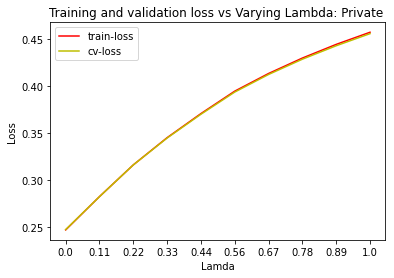

In [40]:
values = range(len(regularizations))
plt.plot(train_historys, 'r', label='train-loss')
plt.plot(cv_historys, 'y', label='cv-loss')
plt.title("Training and validation loss vs Varying Lambda: Private ")
plt.xlabel('Lamda')
plt.ylabel("Loss")
plt.xticks(values,regularizations)
plt.legend(loc=0)
plt.show()

#### Alpha vs Number of iteration to get desired amount of loss

In [24]:
itreration_list = []

alpha = 0.0
increment_value = 0.1
n_steps = 10
for i in range(0, n_steps):
    alpha = alpha + increment_value
    lr_clf = Logistic_Regression(x, y ,iteration = 50 , alpha= alpha, differentially_private = True)
    lr_clf.verbose = False
    n_iteration = lr_clf.AlphavsIteration()
    itreration_list.append(n_iteration)

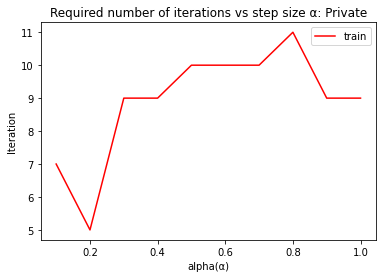

In [26]:
alpha_range = [increment_value*x for x in range(1, n_steps+1)]

plt.plot(alpha_range, itreration_list, 'r', label='train')
plt.xlabel("alpha(α)")
plt.ylabel("Iteration")
plt.title("Required number of iterations vs step size α: Private")
plt.legend(loc=0)
plt.show()

In [27]:
itreration_list = []

alpha = 0.0
increment_value = 0.1
n_steps = 10
for i in range(0, n_steps):
    alpha = alpha + increment_value
    lr_clf = Logistic_Regression(x, y ,iteration = 50 , alpha= alpha, differentially_private = False)
    lr_clf.verbose = False
    n_iteration = lr_clf.AlphavsIteration()
    itreration_list.append(n_iteration)

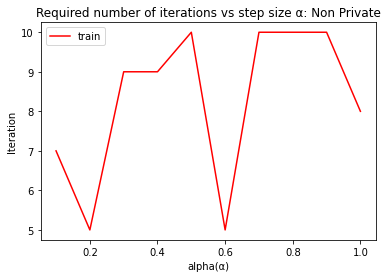

In [28]:
alpha_range = [increment_value*x for x in range(1, n_steps+1)]

plt.plot(alpha_range, itreration_list, 'r', label='train')
plt.xlabel("alpha(α)")
plt.ylabel("Iteration")
plt.title("Required number of iterations vs step size α: Non Private")
plt.legend(loc=0)
plt.show()

In [30]:
#differentially_private: Enabled
lr_clf  = Logistic_Regression(x, y ,alpha=.1, differentially_private=True)
theta, train_history, cv_history, theta_history = lr_clf.fit(verbose=False)
accuracy, probabilities, prediction = lr_clf.predict(xt,yt)

100%|██████████| 100/100 [00:04<00:00, 21.69it/s]

Stats: Iterations 100, Train-Loss:  0.20142823835901458, CV-Loss:  0.2046710796896074


In [31]:
precision, recall, thresholds = precision_recall_curve(yt, probabilities)

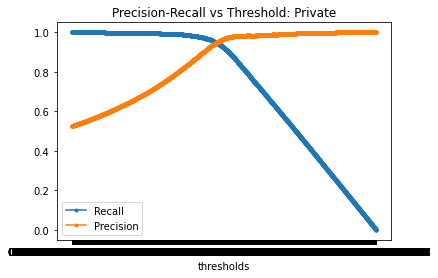

In [32]:
values = range(len(thresholds))
plt.plot(recall, marker='.', label='Recall')
plt.plot(precision, marker='.', label='Precision')
plt.xlabel('thresholds')
plt.title('Precision-Recall vs Threshold: Private')
plt.xticks(values,thresholds)
plt.legend()
plt.show()

In [33]:
#differentially_private: Disabled
lr_clf  = Logistic_Regression(x, y ,alpha=.1, differentially_private=False)
theta, train_history, cv_history, theta_history = lr_clf.fit(verbose=False)
accuracy, probabilities, prediction = lr_clf.predict(xt,yt)

100%|██████████| 100/100 [00:01<00:00, 75.41it/s]

Stats: Iterations 100, Train-Loss:  0.20159825343204082, CV-Loss:  0.20484803113424313


In [34]:
precision, recall, thresholds = precision_recall_curve(yt, probabilities)

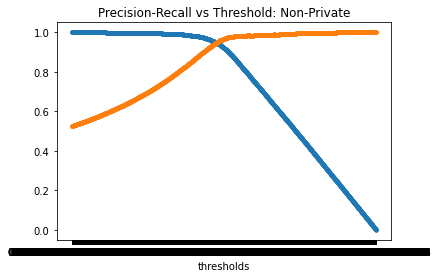

In [35]:
values = range(len(thresholds))
plt.plot(recall, marker='.', label='Recall')
plt.plot(precision, marker='.',label='Precision')
plt.xlabel('thresholds')
plt.title('Precision-Recall vs Threshold: Non-Private')
plt.xticks(values,thresholds)
plt.show()

In [37]:
def plot_roc_curve(fpr, tpr,dp):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    title = 'Receiver Operating Characteristic (ROC) Curve' 
    title += ": Private" if dp else ": Non-Private"

    plt.title(title)
    plt.legend()
    plt.show()

100%|██████████| 100/100 [00:04<00:00, 20.81it/s]


Stats: Iterations 100, Train-Loss:  0.2015022697105796, CV-Loss:  0.20521747765059659


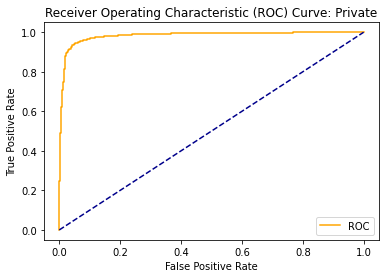

In [38]:
#differentially_private: Enabled
lr_clf  = Logistic_Regression(x, y ,alpha=.1, differentially_private=True)
theta, train_history, cv_history, theta_history = lr_clf.fit(verbose=False)
accuracy, probabilities, prediction = lr_clf.predict(xt,yt)

fpr, tpr, thresholds = roc_curve(yt, probabilities)
plot_roc_curve(fpr, tpr, True) 

100%|██████████| 100/100 [00:01<00:00, 72.87it/s]

Stats: Iterations 100, Train-Loss:  0.20108087204175285, CV-Loss:  0.20405301433202921


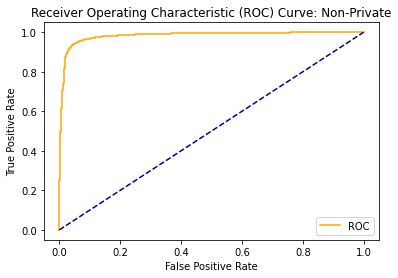

In [39]:
#differentially_private: Disabled
lr_clf  = Logistic_Regression(x, y ,alpha=.1, differentially_private=False)
theta, train_history, cv_history, theta_history = lr_clf.fit(verbose=False)
accuracy, probabilities, prediction = lr_clf.predict(xt,yt)

fpr, tpr, thresholds = roc_curve(yt, probabilities)
plot_roc_curve(fpr, tpr, False) 